In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import RobustScaler, QuantileTransformer
from sklearn.metrics import mean_absolute_error

from catboost import CatBoostRegressor
from sklearn.linear_model import Ridge

In [28]:
df_train = pd.read_csv('../input/home-data-for-ml-course/train.csv')
df_test = pd.read_csv('../input/home-data-for-ml-course/test.csv')

In [29]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [30]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [31]:
df_train['MSSubClass'] = df_train['MSSubClass'].astype(str)
df_test['MSSubClass'] = df_test['MSSubClass'].astype(str)

In [32]:
df_train.select_dtypes(include=[float, int]).corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

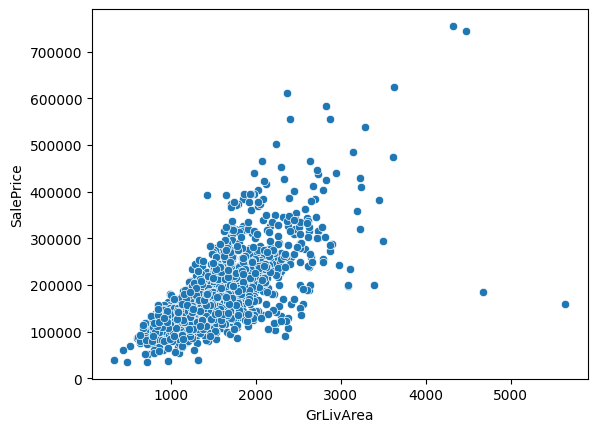

In [33]:
sns.scatterplot(x=df_train['GrLivArea'], y=df_train['SalePrice'])
plt.show()

In [34]:
df_train.drop(index = df_train[(df_train['GrLivArea'] > 4000) & (df_train['SalePrice'] < 300000)].index, inplace=True)

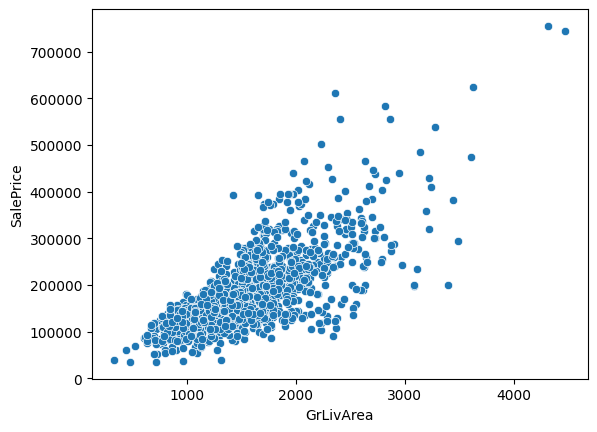

In [35]:
sns.scatterplot(x=df_train['GrLivArea'], y=df_train['SalePrice'])
plt.show()

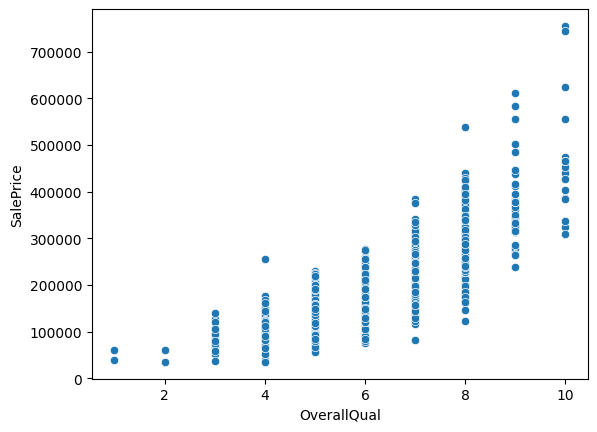

In [36]:
sns.scatterplot(x=df_train['OverallQual'], y=df_train['SalePrice'])
plt.show()

In [60]:
df_all = pd.concat([df_train , df_test])

In [61]:
df_all['time'] = df_all['YrSold'] - df_all['YearBuilt']
df_all['Total_Area'] = df_all['GrLivArea'] + df_all['TotalBsmtSF']
df_all['Final_Area'] = df_all['Total_Area'] + df_all['GarageArea']
df_all['Overall_Plus'] = df_all['OverallQual'] + df_all['OverallCond']
df_all['Overall_Mi'] = df_all['OverallQual'] - df_all['OverallCond']
df_all['area'] = df_all['Final_Area'] + df_all['LotArea'] * 0.1
df_all

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,YrSold,SaleType,SaleCondition,SalePrice,time,Total_Area,Final_Area,Overall_Plus,Overall_Mi,area
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,2008,WD,Normal,208500.0,5,2566.0,3114.0,12,2,3959.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,2007,WD,Normal,181500.0,31,2524.0,2984.0,14,-2,3944.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,2008,WD,Normal,223500.0,7,2706.0,3314.0,12,2,4439.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,2006,WD,Abnorml,140000.0,91,2473.0,3115.0,12,2,4070.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,2008,WD,Normal,250000.0,8,3343.0,4179.0,13,3,5605.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,2006,WD,Normal,NaN,36,1638.0,1638.0,11,-3,1831.6
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,2006,WD,Abnorml,NaN,36,1638.0,1924.0,9,-1,2113.4
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,2006,WD,Abnorml,NaN,46,2448.0,3024.0,12,-2,5024.0
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,2006,WD,Normal,NaN,14,1882.0,1882.0,10,0,2926.1


In [62]:
df_all.select_dtypes(include=[float, int]).corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
Final_Area       0.853125
Total_Area       0.829042
OverallQual      0.795774
GrLivArea        0.734968
area             0.688713
TotalBsmtSF      0.651153
GarageCars       0.641047
Overall_Mi       0.640016
1stFlrSF         0.631530
GarageArea       0.629217
Overall_Plus     0.596672
FullBath         0.562165
TotRmsAbvGrd     0.537769
YearBuilt        0.523608
YearRemodAdd     0.507717
GarageYrBlt      0.487156
MasVnrArea       0.482719
Fireplaces       0.469862
BsmtFinSF1       0.409384
LotFrontage      0.370584
WoodDeckSF       0.324758
OpenPorchSF      0.321142
2ndFlrSF         0.320532
HalfBath         0.284590
LotArea          0.268179
BsmtFullBath     0.228459
BsmtUnfSF        0.214460
BedroomAbvGr     0.168245
ScreenPorch      0.111415
PoolArea         0.099490
MoSold           0.046124
3SsnPorch        0.044568
BsmtFinSF2      -0.011422
BsmtHalfBath    -0.016881
MiscVal         -0.021203
Id              -0.021673
LowQualFinSF    -0.025625
YrSold      

In [63]:
df_all = df_all.drop(columns = ['Id', 'SalePrice'])
df_all = pd.get_dummies(df_all)
df_all = df_all.fillna(0)
df_all = df_all.astype(int)
df_all

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65,8450,7,5,2003,2003,196,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,80,9600,6,8,1976,1976,0,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,68,11250,7,5,2001,2002,162,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,60,9550,7,5,1915,1970,0,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,84,14260,8,5,2000,2000,350,655,0,490,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21,1936,4,7,1970,1970,0,0,0,546,...,0,0,0,1,0,0,0,0,1,0
1455,21,1894,4,5,1970,1970,0,252,0,294,...,0,0,0,1,1,0,0,0,0,0
1456,160,20000,5,7,1960,1996,0,1224,0,0,...,0,0,0,1,1,0,0,0,0,0
1457,62,10441,5,5,1992,1992,0,337,0,575,...,0,0,0,1,0,0,0,0,1,0


In [64]:
scaler = RobustScaler()
df_all_array = scaler.fit_transform(df_all)
df_all = pd.DataFrame(df_all_array, columns=df_all.columns)
df_all

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.057143,-0.245588,0.5,0.0,0.625000,0.256410,1.202454,0.461119,0.0,-0.542808,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.485714,0.036275,0.0,3.0,0.062500,-0.435897,0.000000,0.832196,0.0,-0.313356,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.142857,0.440686,0.5,0.0,0.583333,0.230769,0.993865,0.160982,0.0,-0.056507,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.085714,0.024020,0.5,0.0,-1.208333,-0.589744,0.000000,-0.207367,0.0,0.125000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,0.0
4,0.600000,1.178431,1.0,0.0,0.562500,0.179487,2.147239,0.391542,0.0,0.039384,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,-1.200000,-1.842157,-1.0,2.0,-0.062500,-0.589744,0.000000,-0.502046,0.0,0.135274,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2913,-1.200000,-1.852451,-1.0,0.0,-0.062500,-0.589744,0.000000,-0.158254,0.0,-0.296233,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,0.0
2914,2.771429,2.585294,-0.5,2.0,-0.270833,0.076923,0.000000,1.167804,0.0,-0.799658,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,0.0
2915,-0.028571,0.242402,-0.5,0.0,0.395833,-0.025641,0.000000,-0.042292,0.0,0.184932,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
X_train = df_all[:len(df_train)]
X_test = df_all[len(df_train):]

In [70]:
y_train = np.log(df_train['SalePrice'])

In [73]:
model = CatBoostRegressor(iterations=5000,
                          depth=6,
                          learning_rate=0.05,
                          verbose=500,
                          eval_metric='MAE')

kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train)):
    print(f"Training fold {fold + 1}")
    
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    model.fit(X_train_fold, y_train_fold, eval_set=(X_val_fold, y_val_fold), use_best_model=True)

    y_pred = model.predict(X_val_fold)
    
    fold_mae = mean_absolute_error(np.exp(y_val_fold), np.exp(y_pred))
    mae_scores.append(fold_mae)
    print(f"Fold {fold + 1} MAE: {fold_mae}")

average_mae = np.mean(mae_scores)
print(f"\nAverage MAE across all folds: {average_mae}")

Training fold 1
0:	learn: 0.2954581	test: 0.3127636	best: 0.3127636 (0)	total: 5.51ms	remaining: 27.5s
500:	learn: 0.0401466	test: 0.0764008	best: 0.0763167 (479)	total: 2.59s	remaining: 23.2s
1000:	learn: 0.0205708	test: 0.0753785	best: 0.0751610 (768)	total: 5.2s	remaining: 20.8s
1500:	learn: 0.0120218	test: 0.0757947	best: 0.0751610 (768)	total: 7.76s	remaining: 18.1s
2000:	learn: 0.0071929	test: 0.0761121	best: 0.0751610 (768)	total: 10.3s	remaining: 15.4s
2500:	learn: 0.0045000	test: 0.0762257	best: 0.0751610 (768)	total: 12.9s	remaining: 12.8s
3000:	learn: 0.0028111	test: 0.0762771	best: 0.0751610 (768)	total: 15.4s	remaining: 10.2s
3500:	learn: 0.0017989	test: 0.0763447	best: 0.0751610 (768)	total: 17.9s	remaining: 7.68s
4000:	learn: 0.0011868	test: 0.0763613	best: 0.0751610 (768)	total: 20.5s	remaining: 5.13s
4500:	learn: 0.0007923	test: 0.0763543	best: 0.0751610 (768)	total: 23.3s	remaining: 2.58s
4999:	learn: 0.0005264	test: 0.0763576	best: 0.0751610 (768)	total: 26.2s	remain

In [77]:
output = pd.read_csv('../input/home-data-for-ml-course/sample_submission.csv')
output['SalePrice'] = np.exp(model.predict(X_test))
output.to_csv('submission.csv', index = False)
output

,Id,SalePrice
0,1461,129308.790108
1,1462,159633.518245
2,1463,185486.328155
3,1464,193002.642276
4,1465,186697.883893
...,...,...
1454,2915,81097.516963
1455,2916,84091.670022
1456,2917,155953.930420
1457,2918,118578.373550
